In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
df = pd.read_csv('Tesla Data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.shape

(1692, 7)

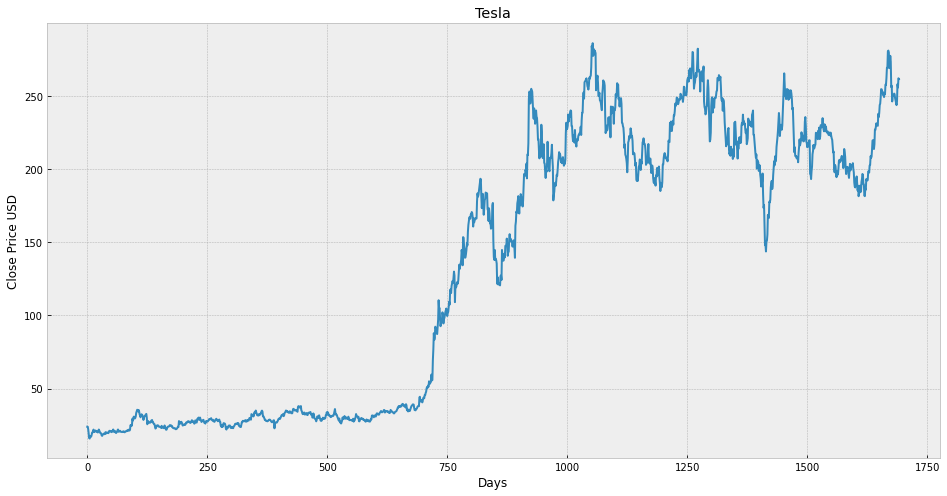

In [5]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [6]:
# Get Close Price in Tesla
df=df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [7]:
#Create a variable to prdict 'x' days out into the future
future_days=250
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
1688,258.000000,NaN
1689,255.729996,NaN
1690,262.049988,NaN
1691,261.500000,NaN


In [8]:
#Create the features data set(X)
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [226.380005]
 [232.740005]
 [238.320007]]


C:\Users\yashk\AppData\Local\Temp\ipykernel_27412\1125639701.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [9]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 27.57      27.459999  28.110001 ... 255.729996 262.049988 261.5     ]


In [10]:
#split the data and 75% for trainning and 25% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 50)

In [11]:
#create the models
#creatye the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [12]:
#get the last 'x' rows of the features data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\yashk\AppData\Local\Temp\ipykernel_27412\1257065942.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[194.300003],
       [190.410004],
       [185.      ],
       [190.570007],
       [188.770004],
       [187.589996],
       [191.      ],
       [203.100006],
       [203.25    ],
       [207.669998],
       [210.089996],
       [210.899994],
       [209.779999],
       [207.460007],
       [207.830002],
       [206.699997],
       [206.789993],
       [205.270004],
       [209.410004],
       [219.440002],
       [218.600006],
       [218.429993],
       [231.550003],
       [230.479996],
       [232.449997],
       [226.050003],
       [226.029999],
       [230.509995],
       [232.949997],
       [230.429993],
       [236.800003],
       [236.610001],
       [239.490005],
       [244.740005],
       [243.179993],
       [244.100006],
       [248.839996],
       [248.75    ],
       [247.139999],
       [244.350006],
       [245.619995],
       [247.729996],
       [247.460007],
       [247.429993],
       [251.449997],
       [250.800003],
       [249.449997],
       [248.3

In [13]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show tthe model with linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[234.240005  255.990005  227.75      230.259995  230.130005  226.889999
 229.770004  237.589996  246.990005  255.470001  234.843338  257.200012
 250.070007  249.919998  247.820007  254.529999  251.860001  254.509995
 253.880005  247.369995  249.970001  248.289993  253.75      251.820007
 253.740005  251.470001  247.710007  240.759995  241.800003  197.580002
 222.559998  211.529999  214.929993  208.919998  208.690002  208.960007
 207.279999  207.610001  208.289993  204.660004  211.169998  215.210007
 220.279999  216.220001  217.910004  219.580002  225.119995  223.039993
 223.229996  219.559998  218.960007  218.990005  220.679993  232.339996
 248.399994  229.360001  218.789993  217.869995  214.960007  217.699997
 217.929993  215.470001  219.699997  219.610001  196.660004  196.399994
 193.149994  198.550003  201.789993  210.190002  212.279999  216.5
 213.979996  214.440002  215.940002  216.779999  224.779999  224.649994
 222.529999  221.529999  220.399994  226.25      225.259995  228.3600

C:\Users\yashk\AppData\Local\Temp\ipykernel_27412\2248025193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


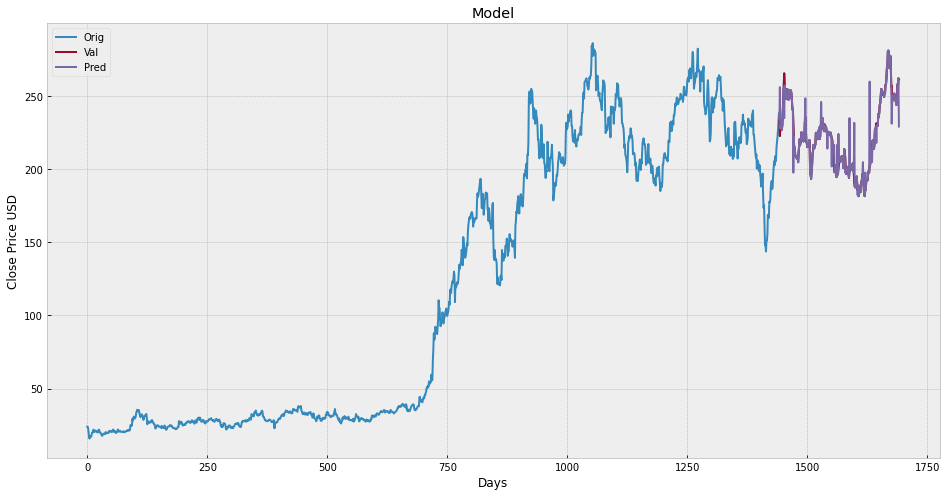

In [14]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

C:\Users\yashk\AppData\Local\Temp\ipykernel_27412\1576927932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


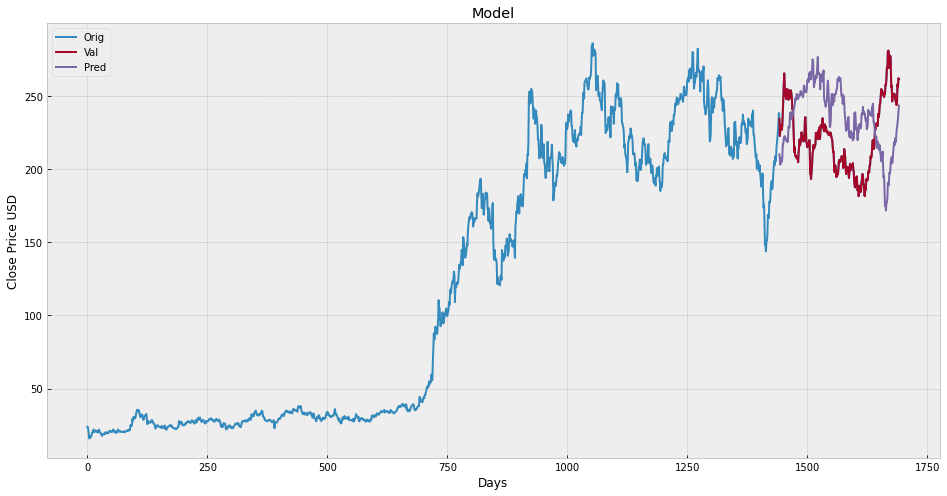

In [15]:
#visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()